In [1]:
import sys

sys.path.append("../..")

In [2]:
from qiskit.quantum_info.random import random_unitary, random_clifford
from qiskit import QuantumCircuit
from clonk.utils.transpiler_passes.pass_manager_v2 import level_0_pass_manager
from clonk.backend_utils import FakeAllToAll
from clonk.utils.riswap_gates.riswap import RiSwapGate
from clonk.utils.transpiler_passes.weyl_decompose import RootiSwapWeylDecomposition
from qiskit.transpiler.passes import CountOps
from qiskit.transpiler import PassManager
from qiskit.circuit.library import CXGate

In [3]:
N = 2000
basis_gate = RiSwapGate(0.5)

pm0 = PassManager()
pm0.append(RootiSwapWeylDecomposition(basis_gate=basis_gate))
pm0.append(CountOps())

res = 0
for _ in range(N):
    qc = QuantumCircuit(2)
    qc.append(random_clifford(2), [0, 1])
    # random_unitary(dim=4)
    pm0.run(qc)
    res += pm0.property_set["count_ops"]["riswap"]
print(res / N)

2.0605


In [29]:
N = 2000
basis_gate = CXGate()

pm0 = PassManager()
pm0.append(RootiSwapWeylDecomposition(basis_gate=basis_gate))
pm0.append(CountOps())

res = 0
for _ in range(N):
    qc = QuantumCircuit(2)
    qc.append(random_clifford(2), [0, 1])
    # random_unitary(dim=4)
    pm0.run(qc)
    res += (
        pm0.property_set["count_ops"]["cx"]
        if "cx" in pm0.property_set["count_ops"].keys()
        else 0
    )
print(res / N)

1.491


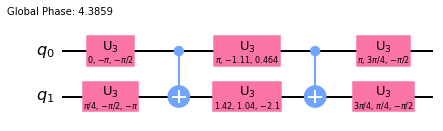

In [7]:
from qiskit.circuit.library import CPhaseGate
import numpy as np

basis_gate = CXGate()

pm0 = PassManager()
pm0.append(RootiSwapWeylDecomposition(basis_gate=basis_gate))
pm0.append(CountOps())

qc = QuantumCircuit(2)
qc.append(CPhaseGate(np.pi / 2), [0, 1])
# random_unitary(dim=4)
transp = pm0.run(qc)

transp.draw(output="mpl")

In [17]:
from qiskit import transpile

transp = transpile(qc, basis_gates=["rz", "sx", "cx"], optimization_level=3)
print(transp.draw(output="latex_source"))

\documentclass[border=2px]{standalone}

\usepackage[braket, qm]{qcircuit}
\usepackage{graphicx}

\begin{document}
\scalebox{1.0}{{$\mathrm{global\,phase:\,} \mathrm{\frac{\pi}{8}}$}
\Qcircuit @C=1.0em @R=0.2em @!R { \\
	 	\nghost{{q}_{0} :  } & \lstick{{q}_{0} :  } & \gate{\mathrm{R_Z}\,(\mathrm{\frac{\pi}{4}})} & \ctrl{1} & \qw & \ctrl{1} & \qw & \qw & \qw\\
	 	\nghost{{q}_{1} :  } & \lstick{{q}_{1} :  } & \qw & \targ & \gate{\mathrm{R_Z}\,(\mathrm{-\frac{\pi}{4}})} & \targ & \gate{\mathrm{R_Z}\,(\mathrm{\frac{\pi}{4}})} & \qw & \qw\\
\\ }}
\end{document}


In [19]:
from qiskit.circuit.library import CPhaseGate
import numpy as np

basis_gate = RiSwapGate(0.5)

pm0 = PassManager()
pm0.append(RootiSwapWeylDecomposition(basis_gate=basis_gate))
pm0.append(CountOps())

qc = QuantumCircuit(2)
qc.append(CPhaseGate(np.pi / 2), [0, 1])
# random_unitary(dim=4)
transp = pm0.run(qc)

print(transp.draw(output="latex"))

Unable to compile LaTeX. Perhaps you are missing the `qcircuit` package. The output from the `pdflatex` command is in `latex_error.log`.


VisualizationError: '`pdflatex` call did not succeed: see `latex_error.log`.'